# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
# Adding a counter to call in sets of 50
counter = 0

print("Beginning Data Retrieval")
print("-------------------------------------")
# Making a request for each city
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 1 | {cities[x]}")
    counter += 1
    if counter == 50:
        break
        
counter = 0      
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 2 | {cities[x + 50]}")
    counter += 1
    if counter == 50:
        break
        
counter = 0      
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 3 | {cities[x + 100]}")
    counter += 1
    if counter == 50:
        break
        
counter = 0      
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 4 | {cities[x + 150]}")
    counter += 1
    if counter == 50:
        break
        
counter = 0      
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 5 | {cities[x + 200]}")
    counter += 1
    if counter == 50:
        break
        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 0 of Set 1 | avarua
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | konevo
Processing Record 6 of Set 1 | rio claro
Processing Record 7 of Set 1 | chapais
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tongchuan
Processing Record 10 of Set 1 | vestmanna
Processing Record 11 of Set 1 | rungata
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | tabialan
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | meulaboh
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | acajutla
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | yarmouth
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | nisia floresta
Processing Record 22 of Set 1 | ponta do sol
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&q="
print(query_url)

#Creating an empty list to store procossing log
city_name = []
cloudiness =[]
country = []
date = []
humidity =[]
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city + "&units=" + units)
    response_json = response.json()
    print(json.dumps(response_json, indent=4, sort_keys=True))
    try:
        city_name.append(response_json['name'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
    except:
        print("City not found")
        pass

https://api.openweathermap.org/data/2.5/weather?&appid=3c69e2440c645c6447da4ba851075ac7&q=
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -21.21,
        "lon": -159.78
    },
    "dt": 1581991646,
    "id": 4035715,
    "main": {
        "feels_like": 84.22,
        "humidity": 78,
        "pressure": 1004,
        "temp": 82.4,
        "temp_max": 82.4,
        "temp_min": 82.4
    },
    "name": "Avarua",
    "sys": {
        "country": "CK",
        "id": 7271,
        "sunrise": 1581957041,
        "sunset": 1582002953,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity drizzle",
            "icon": "09d",
            "id": 300,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 14.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
   

In [73]:
data_list = {"City" : city_name, 
              "Cloudiness" : cloudiness, 
              "Country" : country, 
              "Date" : date, 
              "Humidity" : humidity, 
              "Latitude" : lat, 
              "Longitude" : lng, 
              "Max Temp" : max_temp, 
              "Wind Speed" : wind_speed}
plot_data = pd.DataFrame(data_list)
plot_data.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Latitude      570
Longitude     570
Max Temp      570
Wind Speed    570
dtype: int64

In [74]:
plot_data

City  Cloudiness Country        Date  Humidity  Latitude  Longitude  \
0       Avarua         100      CK  1581991646        78    -21.21    -159.78   
1       Touros          20      BR  1581991647        83     -5.20     -35.46   
2      Rikitea         100      PF  1581991647        77    -23.12    -134.97   
3      Mataura          99      NZ  1581991647        83    -46.19     168.86   
4     Hermanus          66      ZA  1581991648        88    -34.42      19.23   
..         ...         ...     ...         ...       ...       ...        ...   
565   Carolina          90      PR  1581991884        88     18.38     -65.96   
566  Ketchikan          75      US  1581991885        86     55.34    -131.65   
567   Araioses         100      BR  1581991886        93     -2.89     -41.90   
568     Noumea          75      NC  1581991889        58    -22.28     166.46   
569    Lesnoye          86      RU  1581991889        88     58.28      35.52   

     Max Temp  Wind Speed  
0       82.40       14.99  
1       80.60        8.05  
2       79.43       13.87  
3       66.99        3.00  
4       64.99        8.01  
..        ...         ...  
565     75.20       13.87  
566     42.80        6.93  
567     76.08        4.18  
568     87.80        8.05  
569     35.06       14.65  

[570 rows x 9 columns]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

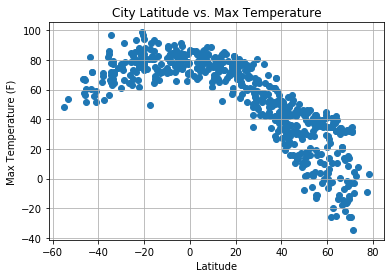

In [75]:
# Building a scatter plot for Lat and max temp
plt.scatter(plot_data["Latitude"], plot_data["Max Temp"])

# Incorporating the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("LatvsMaxTemp.png")

# Lets take a look
plt.show()

#### Latitude vs. Humidity Plot

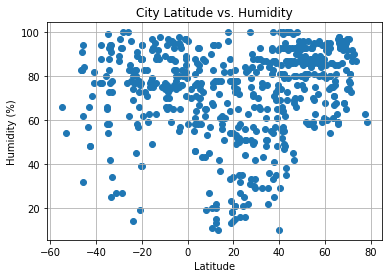

In [76]:
# Building a scatter plot for Lat and max temp
plt.scatter(plot_data["Latitude"], plot_data["Humidity"])

# Incorporating the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("LatvsHumidity.png")

# Lets take a look
plt.show()

#### Latitude vs. Cloudiness Plot

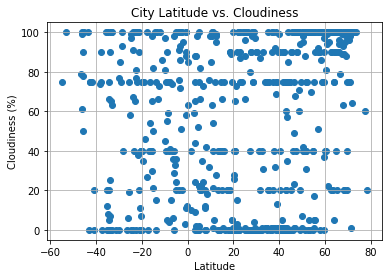

In [77]:
# Building a scatter plot for Lat and max temp
plt.scatter(plot_data["Latitude"], plot_data["Cloudiness"])

# Incorporating the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("LatvsCloudiness.png")

# Lets take a look
plt.show()

#### Latitude vs. Wind Speed Plot

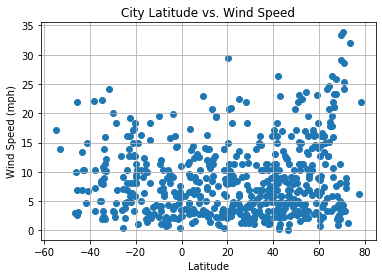

In [78]:
# Building a scatter plot for Lat and max temp
plt.scatter(plot_data["Latitude"], plot_data["Wind Speed"])

# Incorporating the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("LatvsWindSpeed.png")

# Lets take a look
plt.show()

## Linear Regression

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northern_data = plot_data.loc[plot_data['Latitude'] > 0,:]
southern_data = plot_data.loc[plot_data['Latitude'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8488883458893371


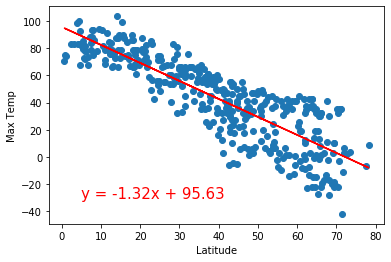

In [90]:
x_values = northern_data["Latitude"]
y_values = northern_data["Max Temp"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("N_LinearRegressMaxTemp.png")

# Lets take a look
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4587576316861053


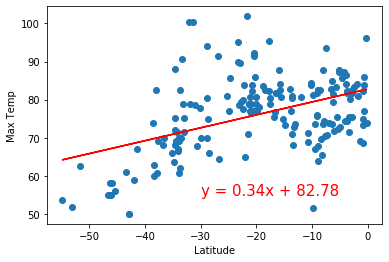

In [92]:
x_values = southern_data["Latitude"]
y_values = southern_data["Max Temp"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("S_LinearRegressMaxTemp.png")

# Lets take a look
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4171702998268354


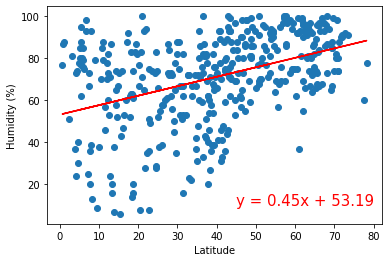

In [97]:
x_values = northern_data["Latitude"]
y_values = northern_data["Humidity"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("N_LinearRegressHumidity.png")

# Lets take a look
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20500202700921266


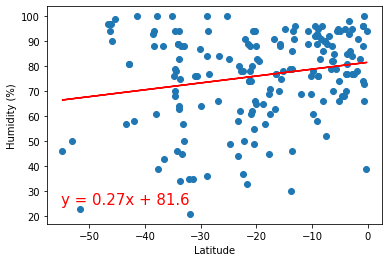

In [101]:
x_values = southern_data["Latitude"]
y_values = southern_data["Humidity"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("S_LinearRegressHumidity.png")

# Lets take a look
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.36692195914904485


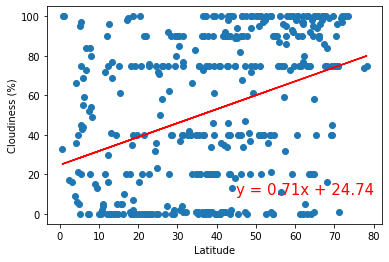

In [102]:
x_values = northern_data["Latitude"]
y_values = northern_data["Cloudiness"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("N_LinearRegressCloudiness.png")

# Lets take a look
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21570595544014548


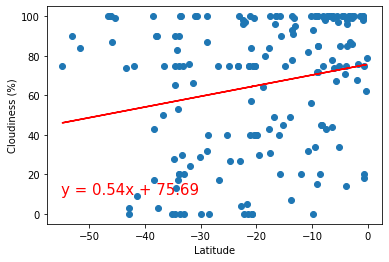

In [104]:
x_values = southern_data["Latitude"]
y_values = southern_data["Cloudiness"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("S_LinearRegressCloudiness.png")

# Lets take a look
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09647376104332572


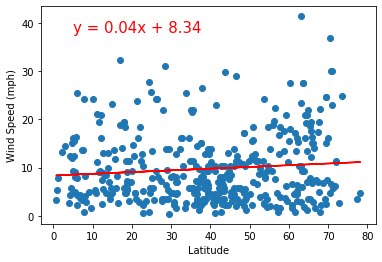

In [106]:
x_values = northern_data["Latitude"]
y_values = northern_data["Wind Speed"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,38),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("N_LinearRegressWindSpeed.png")

# Lets take a look
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15140427147371938


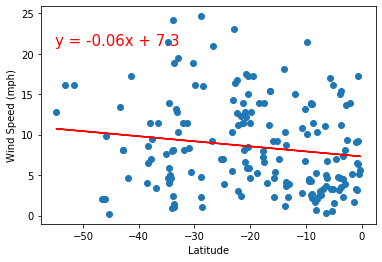

In [110]:
x_values = southern_data["Latitude"]
y_values = southern_data["Wind Speed"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Building a scatter plot for Lat and max temp
plt.scatter(x_values, y_values)

# Plotting regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")

# Incorporating the other graph properties
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")

# Saving the figure
plt.savefig("S_LinearRegressWindSpeed.png")

# Lets take a look
plt.show()